# DSC 672 Data Science Capstone
## **Bike Sharing in Washington D.C.**
## Group 6
### Sidhant Thakur sthakur5@depaul.edu
### Saransh Thakur sthakur6@depaul.edu
### Parth Babubhai Patel ppate270@depaul.edu



**1.1 Introduction**

In this machine learning project, several machine learning approaches would be used to forecast bike demand. There are several bike rental firms, such Zagster and City Bikes, and it would be very beneficial for the businesses if they could forecast the demand for bikes at specific times of day and for other factors like temperature and wind speed. Therefore, it would be crucial to comprehend the demand for motorcycles at various points in time so that businesses could utilize this knowledge to increase profits and deliver bikes to various individuals as and when necessary, respectively. With the use of machine learning and data analytics, several bike loan firms will see a considerable boost in income.

We would be using the Washington bike demand dataset in the study and getting to know some of their aspects. Later, we would add a few more attributes to get a decent estimation of the many parameters that must be taken into account when applying various machine learning and deep learning algorithms to visualization. To determine how well our model did overall, not just on the data used for training but also on the test data, we would next draw the graphs of the predictions and the actual values.


In [ ]:
import sys
import pprint
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, roc_auc_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.models import Sequential
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving hour.csv to hour.csv


In [ ]:
#from google.colab import drive
#drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
hour = pd.read_csv('hour.csv')

FileNotFoundError: ignored

In [ ]:
hour.head()


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
hour.shape

(17379, 17)

In [ ]:
hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [ ]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
hour['day'] = pd.to_datetime(hour['dteday']).dt.day


In [ ]:
hour['day'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [ ]:
print("The different unique numerical values present in Season feature are: {}".format(hour['season'].unique()))


The different unique numerical values present in Season feature are: [1 2 3 4]


In [ ]:
hour['Season_cat'] = hour['season'].replace({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})


In [ ]:
hour['Season_cat']

0        Spring
1        Spring
2        Spring
3        Spring
4        Spring
          ...  
17374    Spring
17375    Spring
17376    Spring
17377    Spring
17378    Spring
Name: Season_cat, Length: 17379, dtype: object


# **2.1 Different Season Plots**

As part of the research, we will be analyzing the Washington bike demand dataset and learning about some of its aspects. In the future, we would add a few more features to gain a better idea of the many factors that must be taken into account while implementing visualization and other machine learning and deep learning algorithms. The graphs of the predictions and actual values would then be shown to determine how well our model did overall, not just on the training data but also on the test data.


# **2.1.1 Countplot of Different Seasons**

The list of the various seasons is shown below, and it is clear that the fall season values are a little higher than those of the other seasons. The difference in the number of days in each month is the reason of this. In light of the seasonal statistics, we may thus make an informed judgment regarding the demand for motorcycles.




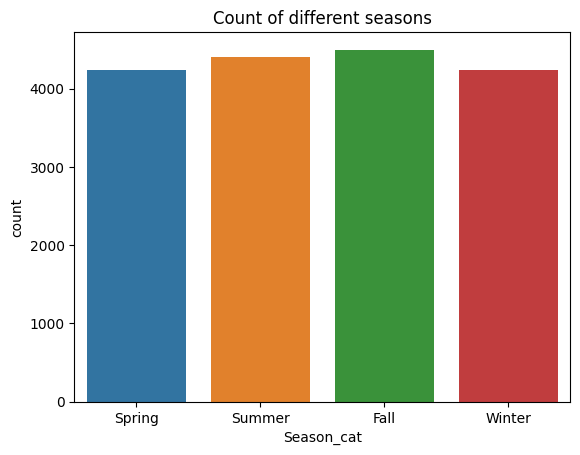

In [ ]:
sns.countplot(data = hour, x = 'Season_cat')
plt.title("Count of different seasons")
plt.show()

# **2.1.2 Plot for Average Demand for Bikes during Different Seasons**

According to the information below, the fall season has a higher demand for motorcycles than the other seasons do. Additionally, it has been shown that demand for motorcycles is lowest in the spring.



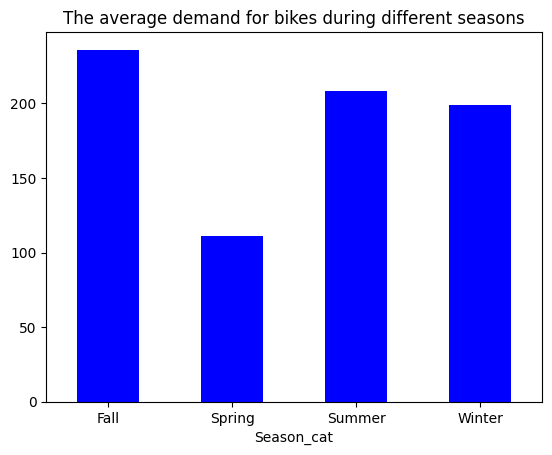

In [ ]:
hour.groupby(['Season_cat']).mean()['cnt'].plot(kind = 'bar', color='blue')
plt.xticks(rotation = 0)
plt.title("The average demand for bikes during different seasons")
plt.show()


# 2.1.3 Total Demand for Bikes for Different Seasons

We can observe from the data below that the autumn has the largest demand for bicycles. On the other hand, we can also see that spring has the lowest bike demand figures. Therefore, it follows that there would be a strong demand for motorcycles in the fall and a relatively weak demand in the spring.


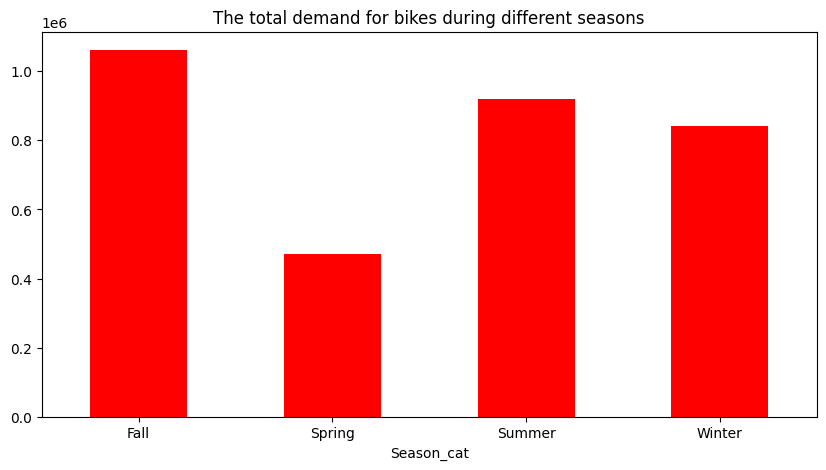

In [ ]:
plt.figure(figsize = (10, 5))
hour.groupby(['Season_cat']).sum()['cnt'].plot(kind = 'bar', color = 'red')
plt.xticks(rotation = 0)
plt.title("The total demand for bikes during different seasons")
plt.show()

In [ ]:
month_dict = {1: "January", 2: "February", 3: "March", 4: "April", 5: "May", 6: "June", 7: "July",
             8: "August", 9: "September", 10: "October", 11: "November", 12: "December"}
hour["Month_cat"] = hour['mnth'].map(month_dict)

In [ ]:
hour["Month_cat"]

0         January
1         January
2         January
3         January
4         January
           ...   
17374    December
17375    December
17376    December
17377    December
17378    December
Name: Month_cat, Length: 17379, dtype: object

# 2.2 Different Month Plots

It's time to go more specific now and see how the demand for motorcycles varies throughout the year. In general, we see that we don't often anticipate many bikes, much alone bikes from loan firms, when there is snow or rain in cities. Therefore, taking into account the various months during which there is a demand for bikes would also help us comprehend the significance of this characteristic in our machine learning study.


# 2.2.1 Countplot of Different Months

This graph, which displays the overall values present during several months, is seen below. Thus, we may infer that certain months have fewer days than others, and as a result, their values are somewhat lower than those of the latter.


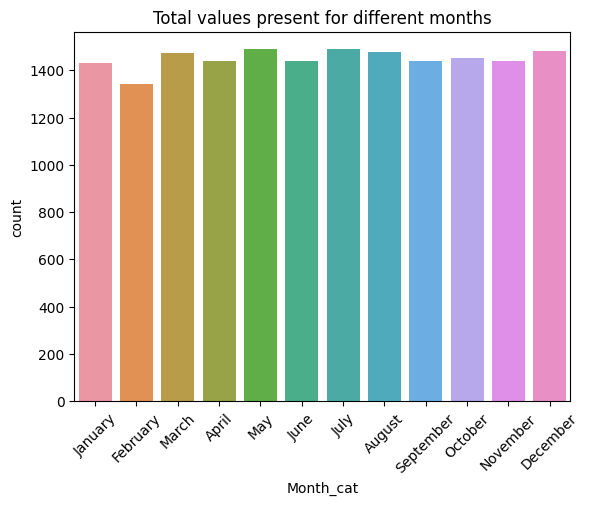

In [ ]:
sns.countplot(data = hour, x = 'Month_cat')
plt.title("Total values present for different months")
plt.xticks(rotation = 45)
plt.show()


# 2.2.2 Average Demand for Bikes for Different Months

September, June, and August are the months with the biggest demand for bicycles. We can observe that some months have relatively low demand in comparison to the others. The lowest average demand for the motorcycles is seen in January, as well. Due to the anticipated increased demand for motorcycles in September, appropriate measures must be taken. But we can tell that there isn't much of a demand for bikes in January. In order to ensure that individuals can access the bikes as needed, the bikes might be placed in a different area.


In [ ]:
hour.groupby(['Month_cat']).mean()['cnt'].plot(kind = 'bar')
plt.xticks(rotation = 45)
plt.title("Average demand for different months")
plt.show()

NameError: ignored

# 2.3 Distribution of Windspeed

The majority of the numbers that we are working with in terms of windspeed are at lower speeds, as can be seen by looking at the distribution of the values. There are several extreme values in existence. Because of this, the majority of the values in the dataset that we are working with have windspeed values that are not particularly high.


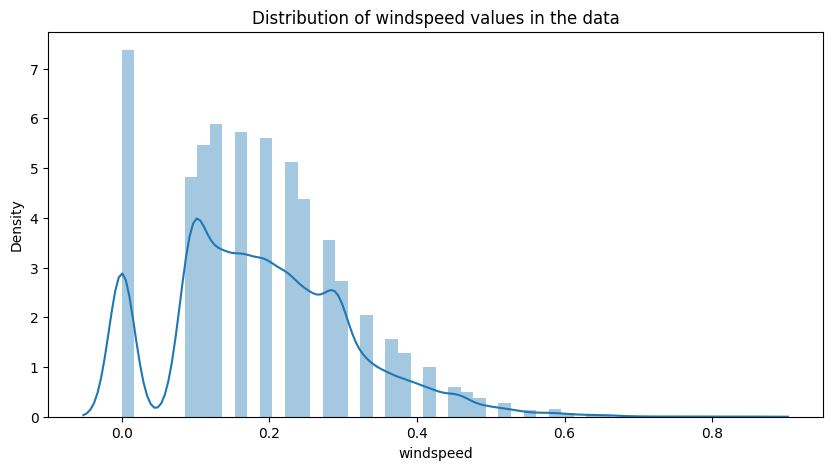

In [ ]:
plt.figure(figsize = (10, 5))
sns.distplot(hour['windspeed'])
plt.title("Distribution of windspeed values in the data")
plt.show()


# 2.4 Distribution of Temperature Values

The temperature data are scattered very uniformly, as can be observed. Since the temperature readings are very uniformly distributed, we are working with them. This would guarantee that the demand for various temperature values would be met.

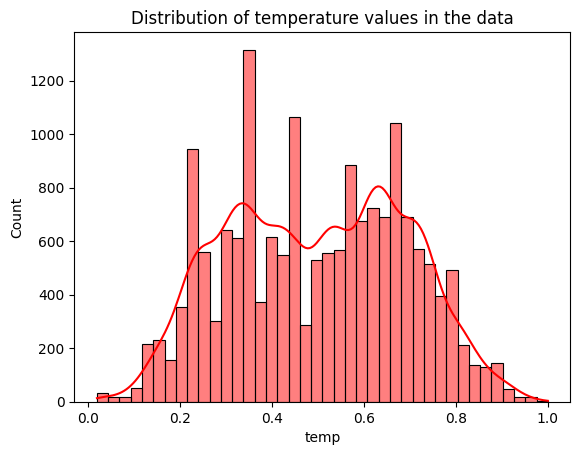

In [ ]:
sns.histplot(hour['temp'], color='red', kde=True)  # 'kde=True' adds a kernel density estimate (KDE) curve
plt.title("Distribution of temperature values in the data")
plt.show()


In [ ]:
temp_max = hour['temp'].max()
temp_min = hour['temp'].min()

# Convert temperature values to a new range between 0 and 1
hour['Temperature_converted'] = (hour['temp'] - temp_min) / (temp_max - temp_min)

hour['Temperature_converted']


0        0.224490
1        0.204082
2        0.204082
3        0.224490
4        0.224490
           ...   
17374    0.244898
17375    0.244898
17376    0.244898
17377    0.244898
17378    0.244898
Name: Temperature_converted, Length: 17379, dtype: float64

# 2.5 Total Demand for Bikes during Different Hours

The peak hour for overall bike demand is seen to be at 5 p.m. Washington time. As is evident, there isn't a lot of demand for motorcycles in the early morning, from 1 am to 7 am, respectively. In addition, we can observe that there is a significant demand for bikes starting at 8 am and that it continues to rise.


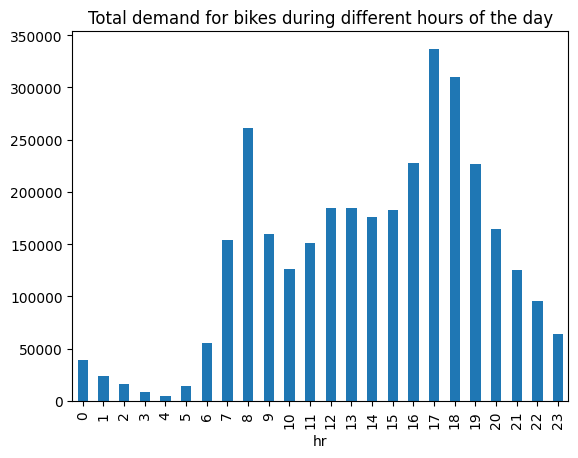

In [ ]:
hour.groupby(['hr'])['cnt'].sum().plot(kind = 'bar')
plt.title("Total demand for bikes during different hours of the day")
plt.show()

# 2.6 Distribution of Humidity values

[link text](https://)It is clear that there is a decent distribution of humidity levels and that they are dispersed quite evenly. The statistics show a noticeable leftward movement.


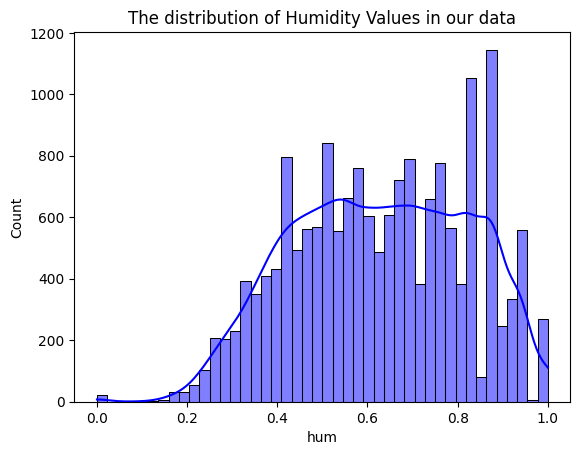

In [ ]:
sns.histplot(hour['hum'], color='blue', kde=True)  # 'kde=True' adds a kernel density estimate (KDE) curve
plt.title("The distribution of Humidity Values in our data")
plt.show()


# 2.7 Scatterplots

When performing exploratory data analysis, scatterplots would help us better grasp the relationships between the many features that we take into account when producing the graphs. A scatterplot provides a plot based on several data points that considers two features. It can be inferred that certain qualities are interdependent or highly connected if the scatterplot's points and the data both exhibit linearity. On the other hand, if the data points are presented on a scatterplot with a negative spread, this would indicate a negative correlation or inverse dependence.


# 2.7.1 Scatterplot between Demand and Registered Users

It is clear that there is a strong likelihood that the demand for bikes will rise in tandem with the number of persons who have registered. The whole demand for motorcycles is caused by casual riders when there are few registered users. With more registered users and registered bikes, it is possible to conclude from the statistics that registered users are primarily responsible for creating the demand. If the number of registered users is minimal, it becomes clear that both registered users and casual riders are responsible for creating the demand.


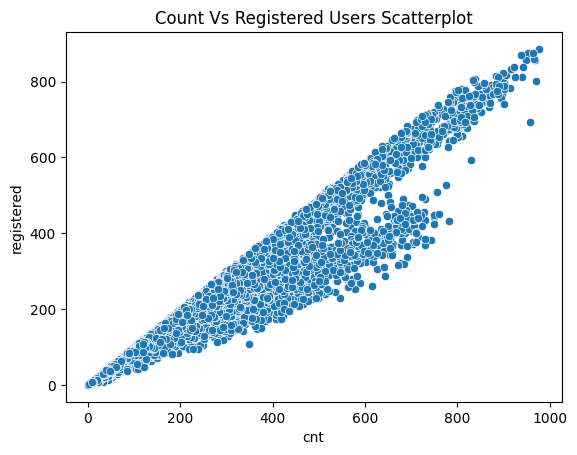

In [ ]:
sns.scatterplot(x = 'cnt', y = 'registered', data = hour)
plt.title('Count Vs Registered Users Scatterplot')
plt.show()

# 2.7.2 Distribution Plot of Casual Riders

When examining the distribution plot, it is clear that there are extremely few situations in which the riders are as many as 400, although there is a larger occurrence of casual riders who are as many as 50. As seen in the graph below, there is a right-tailed distribution where a small number of values are concentrated to the right and a large number of values are distributed to the left. From the graph below, it can be deduced that casual riders under the age of 50 are more common than those over 50, who make up a far larger percentage of the population.

<Axes: xlabel='casual', ylabel='Density'>

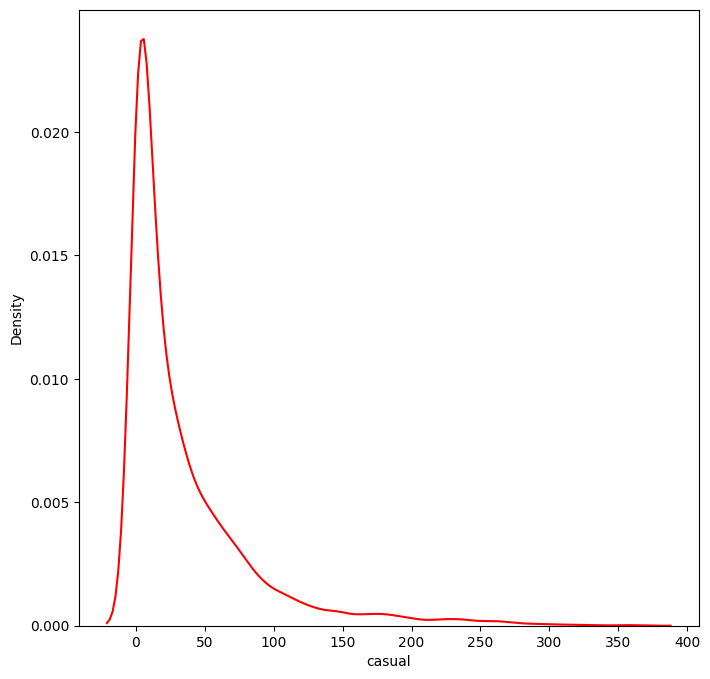

In [ ]:
plt.figure(figsize = (8, 8))
sns.kdeplot(hour['casual'], color = 'red')

# 2.7.3 Scatterplot between Casual and Registered

Below, it can be observed that there appears to be a linear link between registered riders and casual riders. It's possible that this isn't always the case. There may be cases where there are more casual riders than registered cyclists, and vice versa.


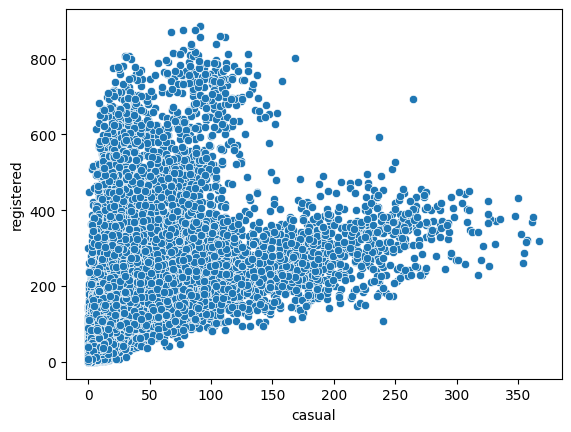

In [ ]:
sns.scatterplot(x = 'casual', y = 'registered',data = hour)
plt.show()

In [ ]:
hour.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'day', 'Season_cat', 'Month_cat',
       'Temperature_converted'],
      dtype='object')

In [ ]:
def temperature_segments(value):
    if value < 0.2:
        return 0.1
    elif value < 0.4 and value > 0.2:
        return 0.3
    elif value < 0.6 and value > 0.4:
        return 0.5
    elif value < 0.7 and value > 0.5:
        return 0.6
    elif value < 0.8 and value > 0.6:
        return 0.7
    elif value < 0.9 and value > 0.7:
        return 0.8
    else:
        return 0.9

Working with temperature segments, we would split the temperature data appropriately.


In [ ]:
hour['Temperature_segments'] = hour['temp'].apply(temperature_segments)

# 2.8 Temperature Segments Countplot

Temperature levels in our data might range from exceedingly high to extremely low. It appears that there aren't many places with extremely high or extremely low temperatures, as may be shown.


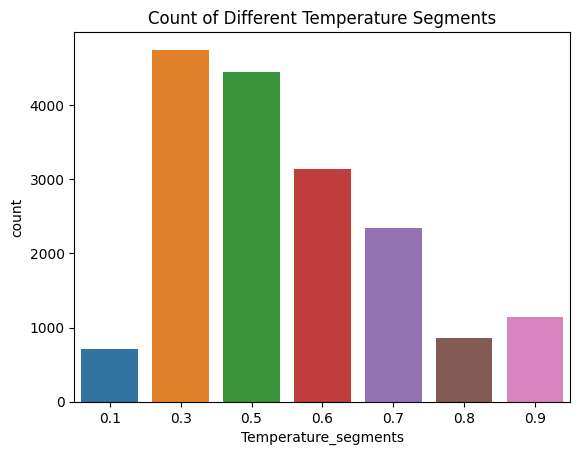

In [ ]:

sns.countplot(x= hour['Temperature_segments'])
plt.title("Count of Different Temperature Segments")
plt.show()

# 2.9 Average of Temperature Segments

Time to investigate how temperature affects the demand for bicycles. The graphic below demonstrates that, in comparison to the other segments we have just constructed, the average demand for bikes is higher for the temperature segment 0.8. This might lead us to draw the conclusion that as the temperature values continue to rise, there is a chance that demand for motorcycles will rise. There is one catch, though: if it's too hot outside, people might not want to ride their bikes. So, this helped us realize how temperature can be a determining element that might be utilized to forecast the demand for bikes.

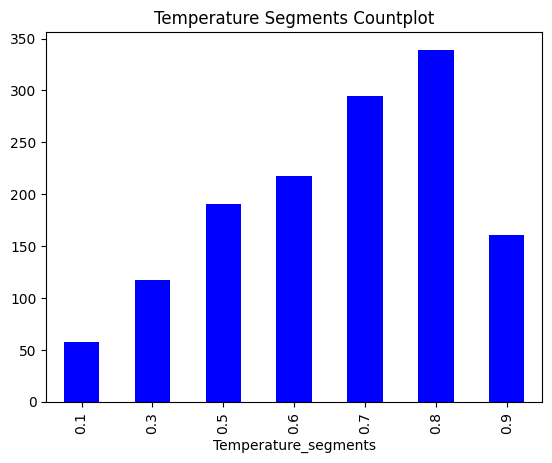

In [ ]:
hour.groupby(['Temperature_segments']).mean()['cnt'].plot(kind = 'bar', color = 'blue')
plt.title("Temperature Segments Countplot")
plt.show()

#2.9(a) Lineplot for Temperature for Different Months

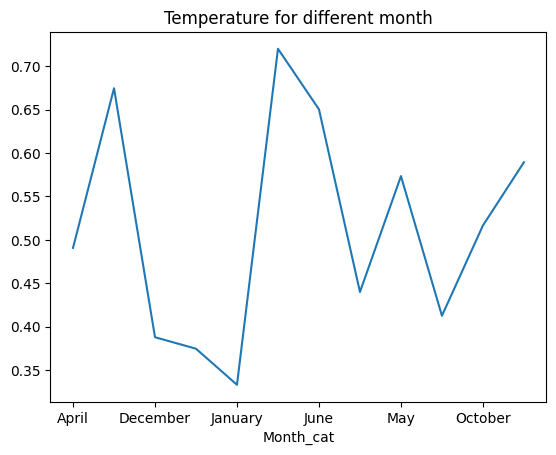

In [ ]:
hour.groupby(['Month_cat']).mean()['Temperature_segments'].plot()
plt.title("Temperature for different month")
plt.show()

The graph avove shows that the average monthly temperature is greater in July and relatively low in February.
Using this knowledge, we will examine how the demand for bicycles might alter depending on the various numbers.

#2.9(b) Scatterplot between Total Demand and Casual Drivers

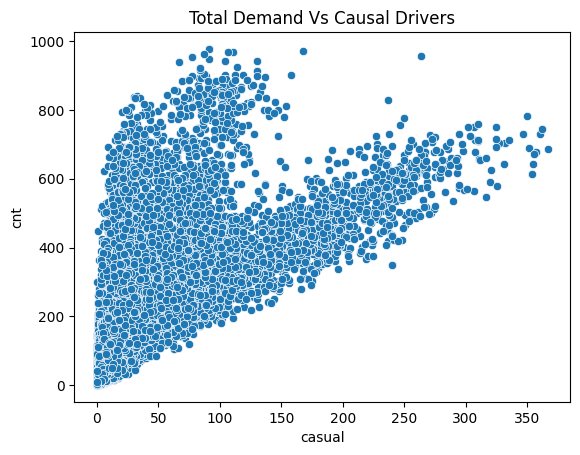

In [ ]:
sns.scatterplot(x = 'casual', y = 'cnt', data = hour)
plt.title("Total Demand Vs Causal Drivers")
plt.show()

As can be seen below, there is a linear relationship between the total number of casual drivers and the demand for the bikes respectively. There seems to a linear trend between the number of casual drivers and the total demand for the bikes.

# **2.9(c) Average Demand for Bikes for Different Days of the Week**

The values of the average demand for motorcycles are nearly the same with only minor variations, as can be seen in the chart below, suggesting that there is not much of a difference between different days of the week. Since it is difficult for us to tell the variations apart, this characteristic may not be very helpful in aiding our ability to forecast the overall demand for motorcycles.

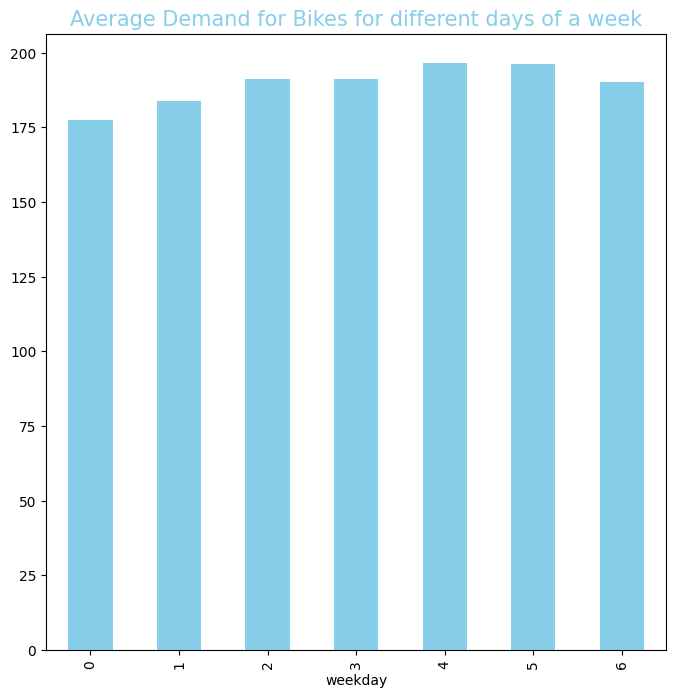

In [ ]:
plt.figure(figsize = (8, 8))
hour.groupby(['weekday']).mean()['cnt'].plot(kind = 'bar', color = 'skyblue')
plt.title("Average Demand for Bikes for different days of a week", fontsize = 15, color  = 'skyblue')
plt.show()

We will now take another look at the data values and data kinds.


In [ ]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   instant                17379 non-null  int64  
 1   dteday                 17379 non-null  object 
 2   season                 17379 non-null  int64  
 3   yr                     17379 non-null  int64  
 4   mnth                   17379 non-null  int64  
 5   hr                     17379 non-null  int64  
 6   holiday                17379 non-null  int64  
 7   weekday                17379 non-null  int64  
 8   workingday             17379 non-null  int64  
 9   weathersit             17379 non-null  int64  
 10  temp                   17379 non-null  float64
 11  atemp                  17379 non-null  float64
 12  hum                    17379 non-null  float64
 13  windspeed              17379 non-null  float64
 14  casual                 17379 non-null  int64  
 15  re

In [ ]:
hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,hum,windspeed,casual,registered,cnt,day,Season_cat,Month_cat,Temperature_converted,Temperature_segments
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,0.81,0.0,3,13,16,1,Spring,January,0.224490,0.3
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,0.80,0.0,8,32,40,1,Spring,January,0.204082,0.3
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,0.80,0.0,5,27,32,1,Spring,January,0.204082,0.3
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,0.75,0.0,3,10,13,1,Spring,January,0.224490,0.3
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,0.75,0.0,0,1,1,1,Spring,January,0.224490,0.3


The season categorical variable and the month categorical variable will no longer be used since they are objects rather than integers or floats. Drop is being used in this instance to eliminate the name-containing columns.


In [ ]:
hour.drop(['Season_cat', 'Month_cat'], axis = 1, inplace = True)

In [ ]:
hour.drop(['instant', 'dteday'], axis = 1, inplace = True)

In [ ]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   season                 17379 non-null  int64  
 1   yr                     17379 non-null  int64  
 2   mnth                   17379 non-null  int64  
 3   hr                     17379 non-null  int64  
 4   holiday                17379 non-null  int64  
 5   weekday                17379 non-null  int64  
 6   workingday             17379 non-null  int64  
 7   weathersit             17379 non-null  int64  
 8   temp                   17379 non-null  float64
 9   atemp                  17379 non-null  float64
 10  hum                    17379 non-null  float64
 11  windspeed              17379 non-null  float64
 12  casual                 17379 non-null  int64  
 13  registered             17379 non-null  int64  
 14  cnt                    17379 non-null  int64  
 15  da

#3. Machine learning Analysis

In [ ]:
X = hour.drop(['cnt'], axis=1).values
y = hour['cnt'].values


In [ ]:
X[0: 5]

array([[ 1.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         6.        ,  0.        ,  1.        ,  0.24      ,  0.2879    ,
         0.81      ,  0.        ,  3.        , 13.        ,  1.        ,
         0.2244898 ,  0.3       ],
       [ 1.        ,  0.        ,  1.        ,  1.        ,  0.        ,
         6.        ,  0.        ,  1.        ,  0.22      ,  0.2727    ,
         0.8       ,  0.        ,  8.        , 32.        ,  1.        ,
         0.20408163,  0.3       ],
       [ 1.        ,  0.        ,  1.        ,  2.        ,  0.        ,
         6.        ,  0.        ,  1.        ,  0.22      ,  0.2727    ,
         0.8       ,  0.        ,  5.        , 27.        ,  1.        ,
         0.20408163,  0.3       ],
       [ 1.        ,  0.        ,  1.        ,  3.        ,  0.        ,
         6.        ,  0.        ,  1.        ,  0.24      ,  0.2879    ,
         0.75      ,  0.        ,  3.        , 10.        ,  1.        ,
         0.2244898 

In [ ]:
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size = 0.3, random_state = 101)


In [ ]:
X_train.shape

(12165, 17)

In [ ]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_cv = scaler.transform(X_cv)

In [ ]:
X_train.shape

(12165, 17)

# **3.1 K Nearest Neighbors**

To acquire the best neighbors for the k-nearest neighbors method, we would use hyperparameter adjustment. while using KNN, we must choose the number of nearest neighbors, and the algorithm will take that number into account while generating predictions. The algorithm would be more biased in favor of the majority class the higher the number of nearest neighbors since it would base decisions on the number of nearest neighbors. To guarantee that we acquire the best predictions from the cross-validation data, we must choose the appropriate hyperparameter. The iteration and various values for the hyperparameters are provided below so that the values may be fitted into the training set and we can obtain the values from the cross-validation data.


In [ ]:
model = KNeighborsRegressor()
mean_squared_error_list = []
mean_absolute_error_list = []
roc_auc_score_list = []
K_nearest_neighbors = [2, 3, 5, 8, 10, 11, 15, 20]
for i in K_nearest_neighbors:
    model = KNeighborsRegressor(n_neighbors = i)
    model.fit(X_train, y_train)
    y_predict = model.predict(X_cv)
    mean_squared_error_list.append(mean_squared_error(y_predict, y_cv))
    mean_absolute_error_list.append(mean_absolute_error(y_predict, y_cv))

making a dictionary out of the dataframe can help us comprehend the various output faults that are there.


In [ ]:
knn_dictionary = {'K Nearest Neighbors': K_nearest_neighbors, 'Mean Squared Error': mean_squared_error_list, 'Mean Absolute Error': mean_absolute_error_list}


In [ ]:
knn_dataframe = pd.DataFrame(knn_dictionary)

We obtain various mean squared errors and mean absolute errors for different nearest neighbor values, accordingly.

In [ ]:
knn_dataframe

,K Nearest Neighbors,Mean Squared Error,Mean Absolute Error
0,2,3630.991609,41.799482
1,3,3280.844713,40.439266
2,5,3057.204557,40.073878
3,8,3134.797444,41.297756
4,10,3245.559457,42.051151
5,11,3321.866870,42.586376
6,15,3521.381360,44.447168
7,20,3749.084734,46.243700


# **Lineplot between Neighbors and the Mean Squared Error**

The graphic below demonstrates how the inaccuracy increases when K is increased. As can be seen, K's ideal value is 5. In view of the fact that it is the best K value among those we evaluated during the cross-validation stage of our machine learning job, we would thus include the value in our predictions.


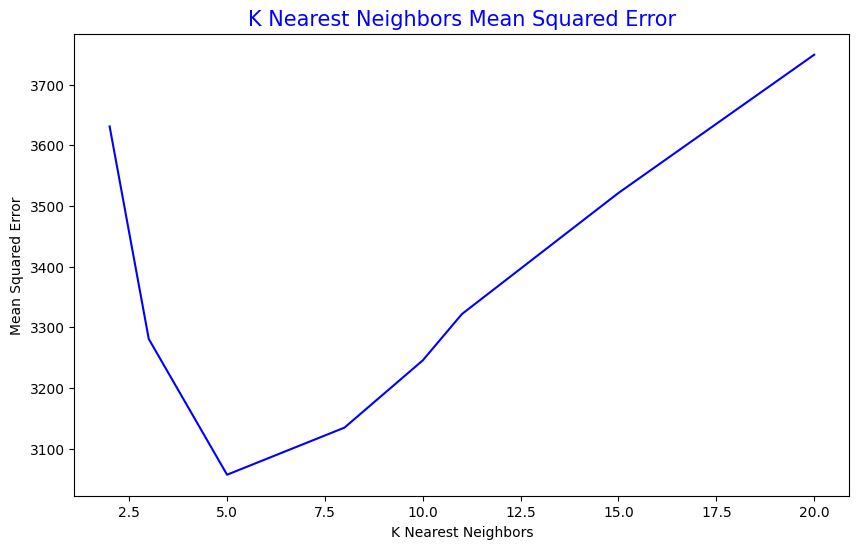

In [ ]:
plt.figure(figsize = (10, 6))
sns.lineplot(x = 'K Nearest Neighbors', y = 'Mean Squared Error', data = knn_dataframe, color = 'blue')
plt.title("K Nearest Neighbors Mean Squared Error", fontsize = 15, color = 'blue')
plt.show()

# Lineplot between Neighbors and Mean Absolute **Error**

This follows an emerging pattern where the mean absolute error increases in tandem with rising K values. when a result, when K's value increases, the mean absolute error also increases substantially. The error is at its lowest point at this time, hence 2 is the optimal value of K. Since Mean Absolute Error is a crucial statistic, we'll continue to use K with the optimal value of 5 to obtain the most accurate predictions possible.


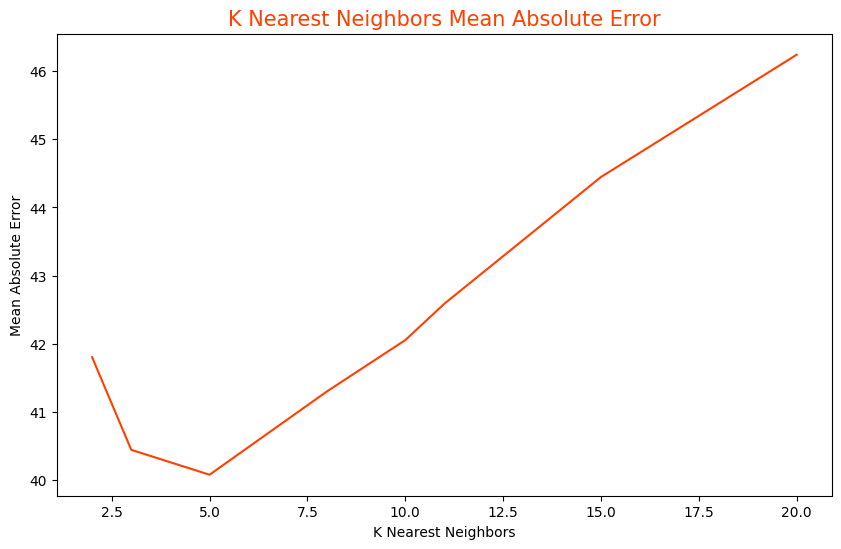

In [ ]:
plt.figure(figsize = (10, 6))
sns.lineplot(x = 'K Nearest Neighbors', y = 'Mean Absolute Error', data = knn_dataframe, color = '#ff4000')
plt.title("K Nearest Neighbors Mean Absolute Error", fontsize = 15, color = '#ff4000')
plt.show()

In [ ]:
best_neighbor_index = np.argmin(mean_squared_error_list)

In [ ]:
best_neighbor = K_nearest_neighbors[best_neighbor_index]

# Scatterplot between Y_test and **Y_predictions**

The values of y_test and y_predictions are fairly dispersed rather than fitting in the straight line as depicted, demonstrating that the K Nearest Regressor performs poorly. Given that the values are significantly dispersed between the y_test and y_predictions, we may infer that K Nearest Regressor is a reasonable machine learning model for our problem.


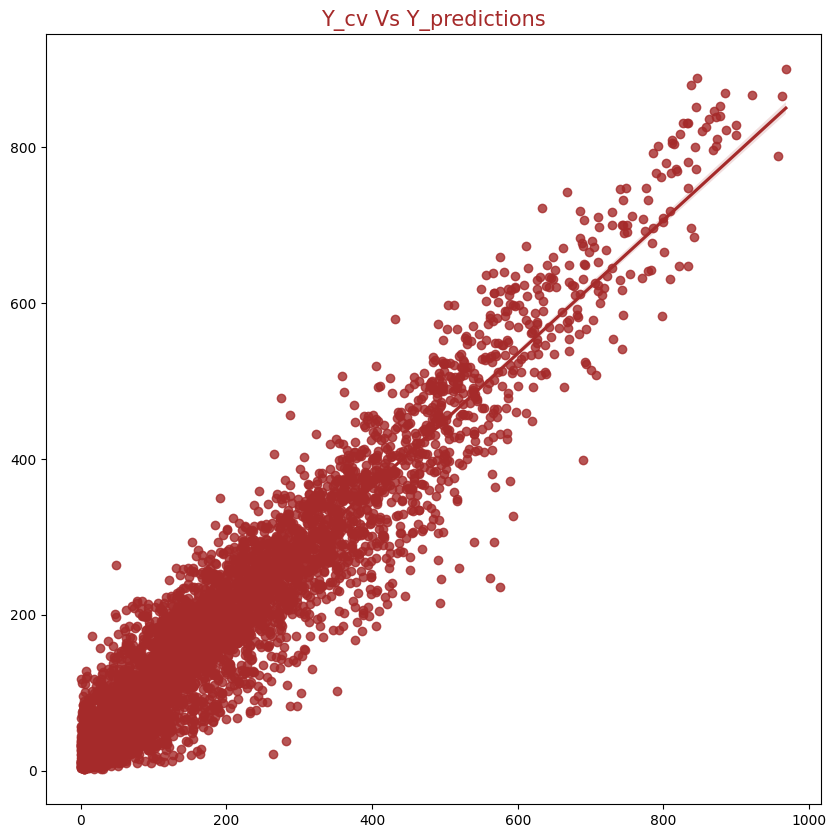

In [ ]:
model = KNeighborsRegressor(n_neighbors = best_neighbor)
model.fit(X_train, y_train)
y_predict = model.predict(X_cv)
plt.figure(figsize=(10, 10))
sns.regplot(x=y_cv, y=y_predict, color='brown')
plt.title('Y_cv Vs Y_predictions', fontsize=15, color='brown')
plt.show()


# **3.2 PLS Regression**

This is another type of regression where the number of components, a hyperparameter, is one that we are free to choose. The hyperparameter would be adjusted, and we would test several values to determine which ones would yield the most accurate forecasts.


In [ ]:
n_components_list = [2, 3, 5, 7, 10]
mean_squared_error_list = []
mean_absolute_error_list = []
for i in n_components_list:
    model = PLSRegression(n_components = i)
    model.fit(X_train, y_train)
    y_predict = model.predict(X_cv)
    mean_squared_error_list.append(mean_squared_error(y_predict, y_cv))
    mean_absolute_error_list.append(mean_absolute_error(y_predict, y_cv))

In [ ]:
pls_regression_dict = {'Number of Components': n_components_list, 'Mean Absolute Error': mean_absolute_error_list,
                      'Mean Squared Error': mean_squared_error_list}

In [ ]:
pls_regression_dataframe = pd.DataFrame(pls_regression_dict)

In [ ]:
pls_regression_dataframe

,Number of Components,Mean Absolute Error,Mean Squared Error
0,2,39.913369,2631.306818
1,3,19.629708,590.610873
2,5,3.243457,18.599942
3,7,0.549953,0.545682
4,10,0.076876,0.010923


In [ ]:
def plot_function(dataframe):
    fig, axes = plt.subplots(1, 2, figsize = (15, 5))
    sns.lineplot(ax = axes[0], x = dataframe.columns[0], y = 'Mean Absolute Error', data = dataframe)
    axes[0].set_title('Number of Components Vs Mean Absolute Error', fontsize = 15)
    sns.lineplot(ax = axes[1], x = dataframe.columns[0], y = 'Mean Squared Error', data = dataframe)
    axes[1].set_title('Number of Components Vs Mean Squared Error', fontsize = 15)
    fig.tight_layout()

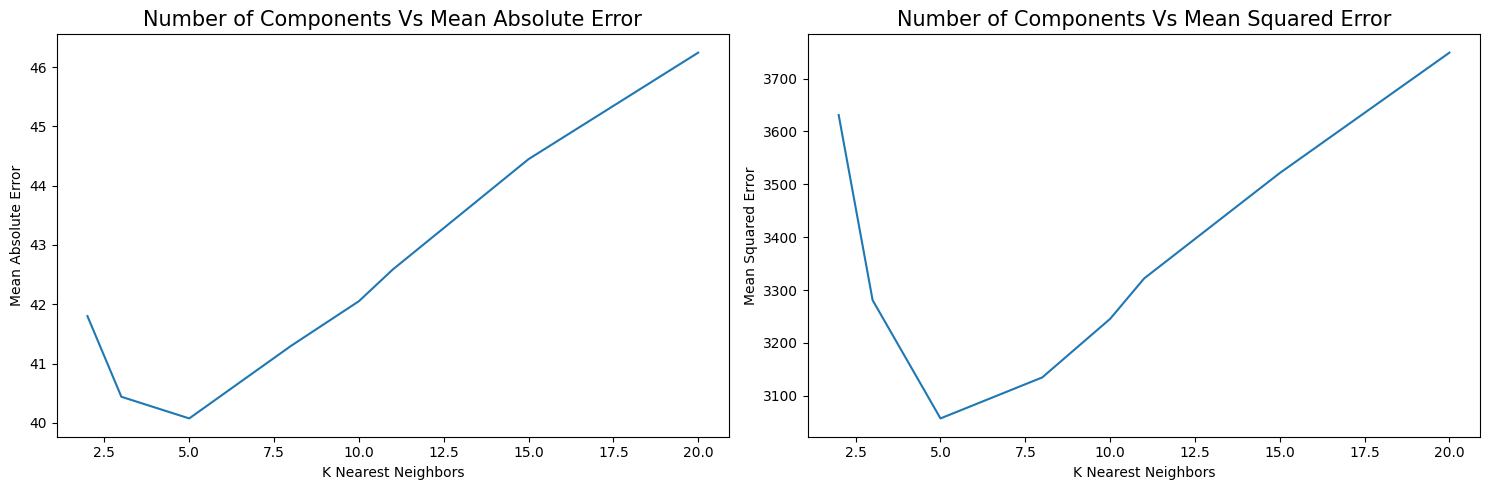

In [ ]:
plot_function(knn_dataframe)

# Plots for PLS **Regression**

The mean absolute error plot and the mean squared error plot will now be the two plots we will be examining. As can be seen, the optimal number of components is 5, where the mean absolute error is the lowest and the mean squared error is also quite low. Despite the fact that there are alternative component values with lower mean squared errors, we choose the optimum hyperparameter to ensure that the mean absolute and mean squared errors are both low.


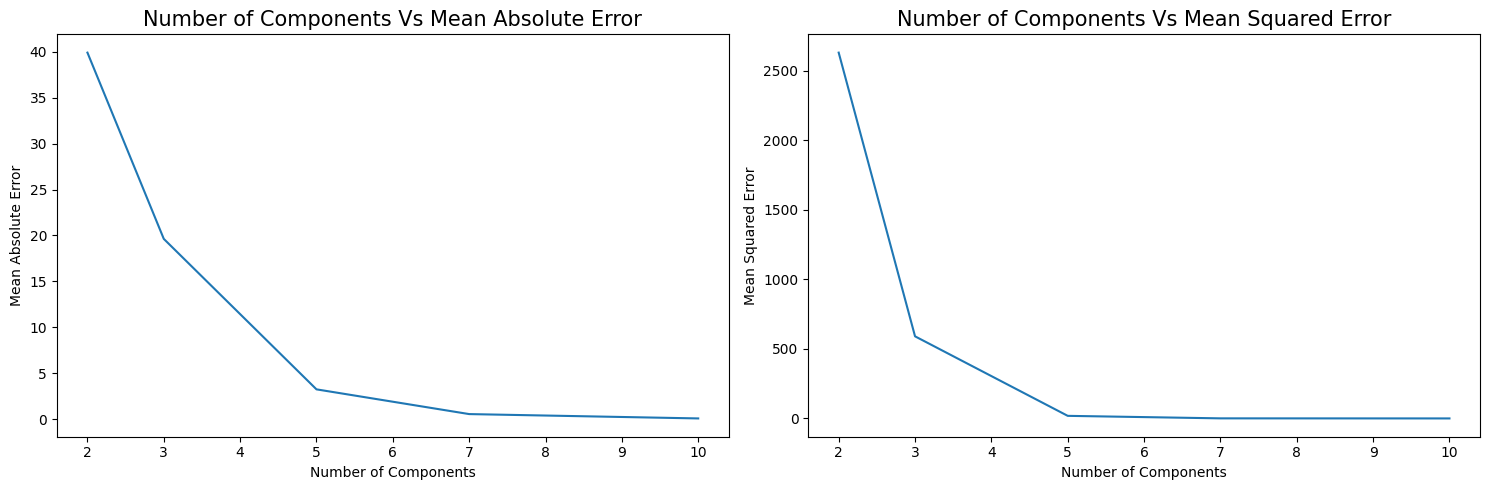

In [ ]:
plot_function(pls_regression_dataframe)

# **3.3** Decision Tree Regressor

Although Decision Tree Regressor has a large number of hyperparameters, we will only be using one of them, the depth of the tree. Let's set several values for the maximum depth and examine how the variables affect various machine learning outputs.


In [ ]:
max_depth_list = [10, 15, 16, 17, 18, 20, 25]
mean_absolute_error_list = []
mean_squared_error_list = []
for i in max_depth_list:
    model = DecisionTreeRegressor(max_depth = i)
    model.fit(X_train, y_train)
    y_predict = model.predict(X_cv)
    mean_absolute_error_list.append(mean_absolute_error(y_predict, y_cv))
    mean_squared_error_list.append(mean_squared_error(y_predict, y_cv))
decision_tree_dict = {'Max Depth': max_depth_list, 'Mean Absolute Error': mean_absolute_error_list,
                     'Mean Squared Error': mean_squared_error_list}
decision_tree_dataframe = pd.DataFrame(decision_tree_dict)


# Decision Tree **Regressor**

In order to determine how the results would change depending on various values, we would examine various decision tree regressor max depth values. Additionally, we see that the optimal number for max depth, for the mean squared error and the mean absolute error, is 20, respectively. The optimal maximum depth value is thus 20, which also has the lowest mean squared error and mean absolute error.


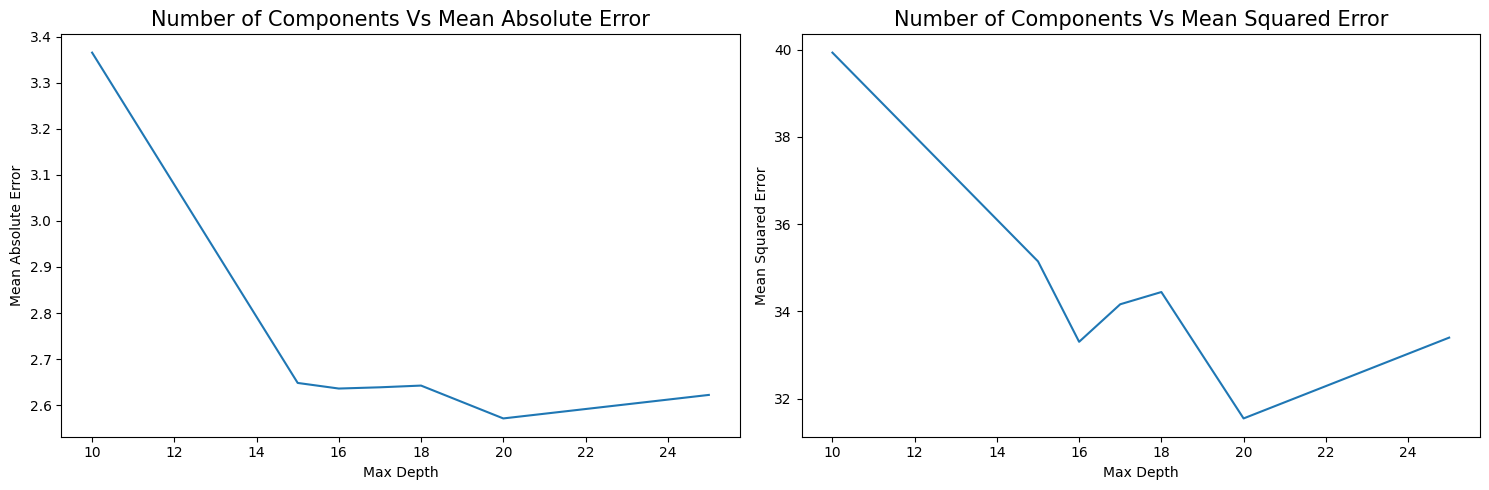

In [ ]:
plot_function(decision_tree_dataframe)

In [ ]:
best_max_depth_index = np.argmin(mean_absolute_error_list)
best_max_depth = max_depth_list[best_max_depth_index]

# Y_test and **Y_predictions**

The decision tree regressor was able to produce highly accurate predictions on the test set, as can be seen from the scatterplot below. Both the forecasts and the actual test output values are reasonably close to one another. As a result, the outcome might be predicted using a decision tree regressor. However, let's also examine the performance of the other machine learning models on the test set.


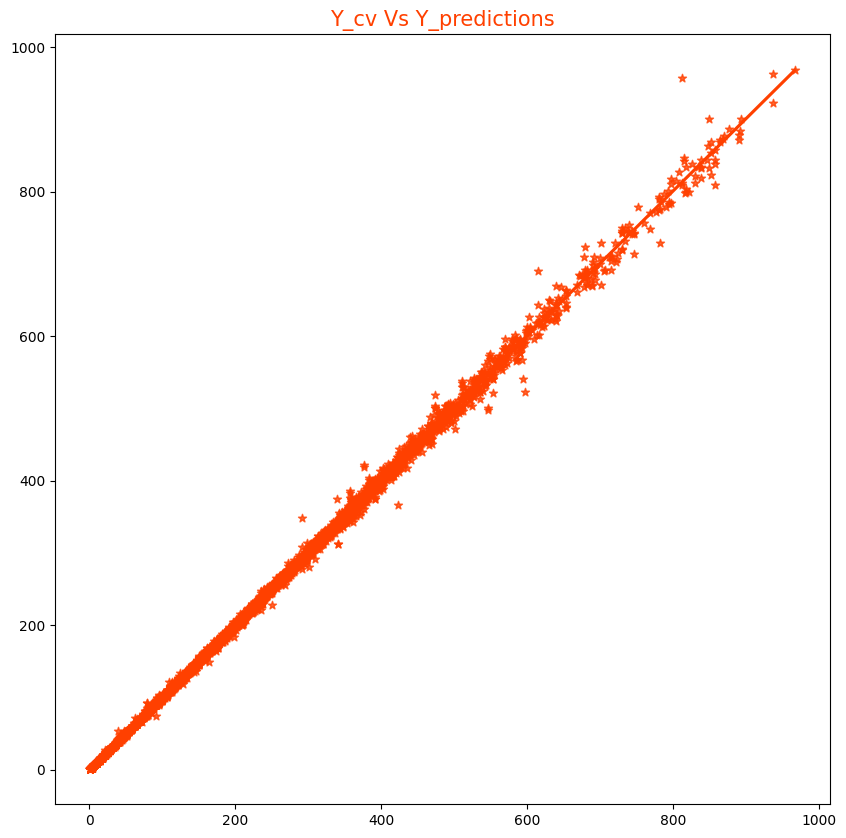

In [ ]:
model = DecisionTreeRegressor(max_depth = best_max_depth)
model.fit(X_train, y_train)
y_predict = model.predict(X_cv)
plt.figure(figsize=(10, 10))
sns.regplot(x=y_predict, y=y_cv, marker='*', color='#ff4000')
plt.title('Y_cv Vs Y_predictions', fontsize=15, color='#ff4000')
plt.show()



```
# This is formatted as code
```

# **3.4 Gradient Boosting Regressor**

The most popular machine learning model should now be applied to the forecasts. In order to guarantee that we will receive the most accurate forecasts, we will employ the gradient boosting decision tree model. In order to obtain the lowest error for the mean squared error and the mean absolute error, respectively, we must adjust a number of estimators, which is a hyperparameter.

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
n_estimators_list = [25, 50, 100, 150, 200, 400, 1000]
mean_squared_error_list = []
mean_absolute_error_list = []
for i in n_estimators_list:
    model = GradientBoostingRegressor(n_estimators = i, max_depth = 10)
    model.fit(X_train, y_train)
    y_predict = model.predict(X_cv)
    mean_squared_error_list.append(mean_squared_error(y_cv, y_predict))
    mean_absolute_error_list.append(mean_absolute_error(y_cv, y_predict))
gradient_boosting_regressor_dict = {"Number of Estimators": n_estimators_list, "Mean Absolute Error": mean_absolute_error_list,
                                   "Mean Squared Error": mean_squared_error_list}
gradient_boosting_regressor_dataframe = pd.DataFrame(gradient_boosting_regressor_dict)

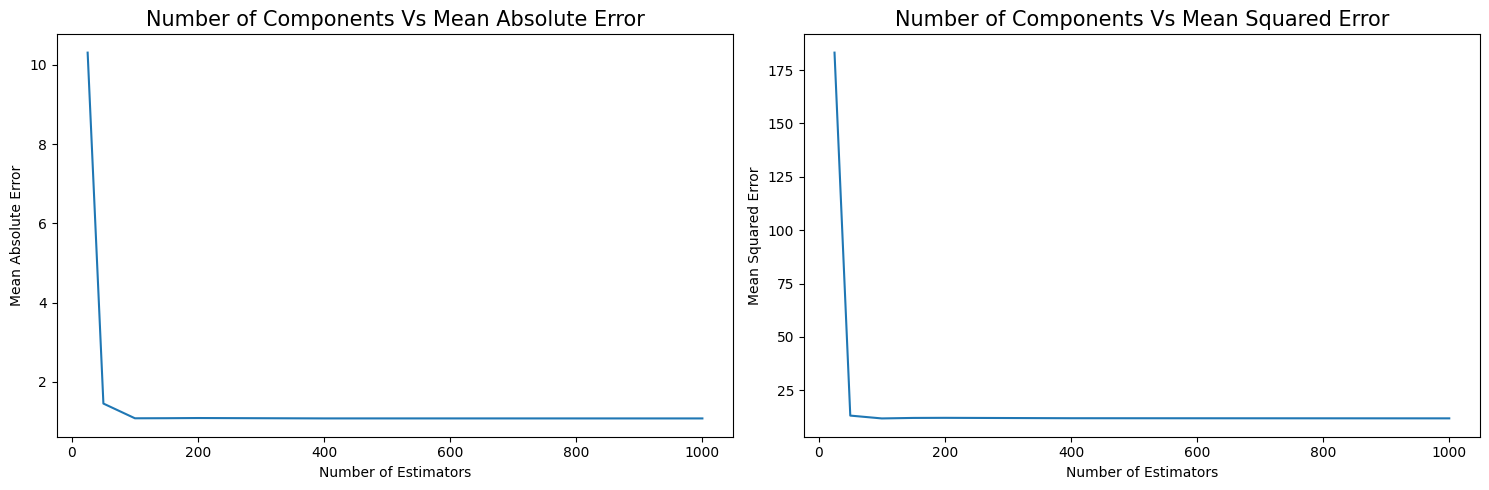

In [ ]:
plot_function(gradient_boosting_regressor_dataframe)

In [ ]:
gradient_boosting_regressor_dataframe

,Number of Estimators,Mean Absolute Error,Mean Squared Error
0,25,10.306138,183.158872
1,50,1.450300,13.184505
2,100,1.078649,11.857324
3,150,1.080747,12.092939
4,200,1.085139,12.136908
5,400,1.075596,11.955964
6,1000,1.075004,11.892425


In [ ]:
n_estimators_index = np.argmin(mean_squared_error_list)
best_n_estimators = n_estimators_list[n_estimators_index]

In [ ]:
model = GradientBoostingRegressor(n_estimators = best_n_estimators, max_depth = 10)
model.fit(X_train, y_train)
y_predict = model.predict(X_cv)

# Scatterplot between Y_test and **Y_predictions**

As can be seen here, a rather straight line can be established between the test results that were actually obtained and the projections. Furthermore, we can observe that the model is outperforming the other machine learning models. Since this machine learning model is doing well on the cross-validation set, we would use it for deployment.

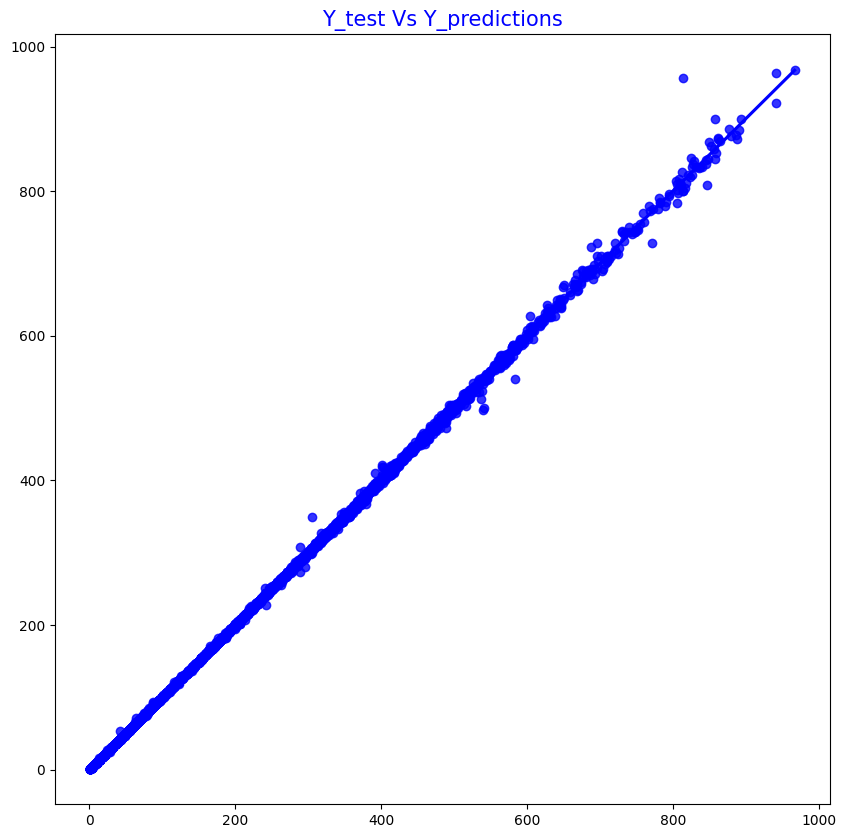

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
sns.regplot(x=y_predict, y=y_cv, marker='o', color='blue')
plt.title("Y_test Vs Y_predictions", fontsize=15, color='blue')
plt.show()


3.5 Lineara Regression

Now let's put the logistic regression model to work and assess its performance. Its performance is not comparable to that of the other machine learning models, as the graphic below illustrates. It is therefore preferable to employ alternative machine learning models for each type of prediction.


The mean squared error of the linear regression model is 1.1070390497353697e-24
The mean absolute error of the linear regression model is 1.023744486873237e-12


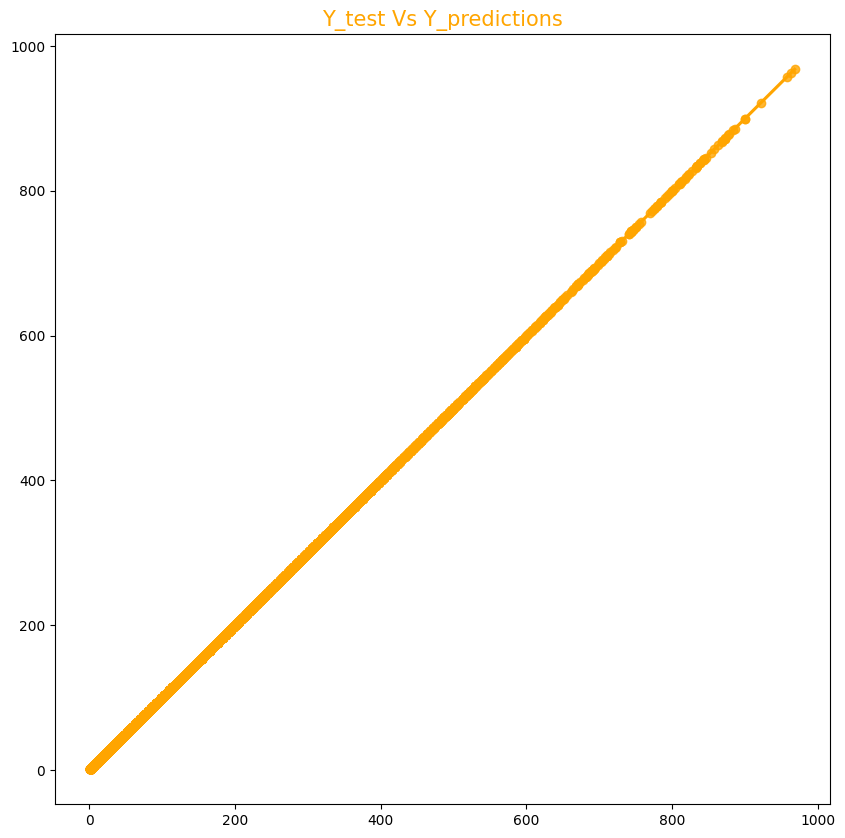

In [ ]:
mean_squared_error_list = []
mean_absolute_error_list = []

model = LinearRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_cv)

mean_squared_error_list.append(mean_squared_error(y_cv, y_predict))
mean_absolute_error_list.append(mean_absolute_error(y_cv, y_predict))

print(f"The mean squared error of the linear regression model is {mean_squared_error_list[0]}")
print(f"The mean absolute error of the linear regression model is {mean_absolute_error_list[0]}")

plt.figure(figsize=(10, 10))
sns.regplot(x=y_cv, y=y_predict, color='orange')  # Corrected the order to x, y
plt.title("Y_test Vs Y_predictions", fontsize=15, color='orange')
plt.show()


## Conclusion:

1. It was evident that the gradient boosting algorithm outperformed the other machine learning models in the cross-validation data.

2. We employed scatterplots to visualize the predictions and actual test values, allowing us to assess the model's output accurately.

3. To standardize the values, we transformed them to fall within the range of 0 to 1.

4. Conducting exploratory data analysis provides valuable insights into the various features and their impact on outcomes across different datasets and distributions.